## Test the different geometries

In [1]:
from pathlib import Path
import numpy as np
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

import sys
sys.path.append(str(Path.cwd().parent))
import heisensim as sim

CMAP = plt.get_cmap("tab20c")
R_BL = 0.4
LX = 1
LY = 1

In [2]:
def pick_max_points(sampler, seed=5):
    np.random.seed(seed)
    points = sampler.sample_positions(1)
    try:
        while True:
            points = sampler._append_to_pos(points)
    except RuntimeError:
        pass
    return points


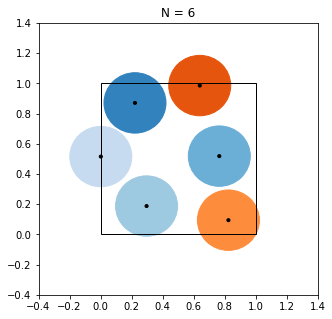

In [3]:
box = sim.Box(lengths=np.array([LX,LY]), r_bl=R_BL)
points = pick_max_points(box)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-R_BL,box.lengths[0]+R_BL)
ax.set_ylim(-R_BL,box.lengths[1]+R_BL)
for i in range(points.shape[0]):
    ax.add_patch(plt.Circle(points[i], R_BL/2, color=CMAP(i)))
    ax.add_patch(plt.Circle(points[i], 0.01, color="black"))
ax.add_patch(plt.Rectangle((0,0), box.lengths[0], box.lengths[1], fill=False))
ax.set_title(f"N = {points.shape[0]}")
fig.show()


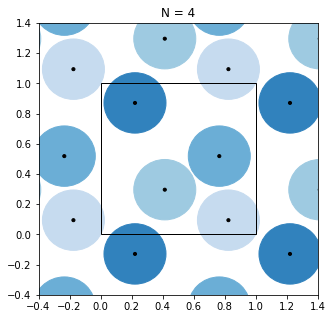

In [4]:
boxPBC = sim.BoxPBC(lengths = np.array([LX,LY]), r_bl=R_BL)
points = pick_max_points(boxPBC)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-R_BL,box.lengths[0]+R_BL)
ax.set_ylim(-R_BL,box.lengths[1]+R_BL)
for i in range(points.shape[0]):
    for x in (-1,0,1):
        for y in (-1,0,1):
            ax.add_patch(plt.Circle(points[i]+[x,y], R_BL/2, color=CMAP(i)))
            ax.add_patch(plt.Circle(points[i]+[x,y], 0.01, color="black"))
ax.add_patch(plt.Rectangle((0,0), box.lengths[0], box.lengths[1], fill=False))
ax.set_title(f"N = {points.shape[0]}")
fig.show()


In [31]:
import scripts.positions as poslib
import scripts.simlib as simlib

In [9]:
data = poslib.load_positions(Path.cwd().parent,"sphere", dim=1, N=5)

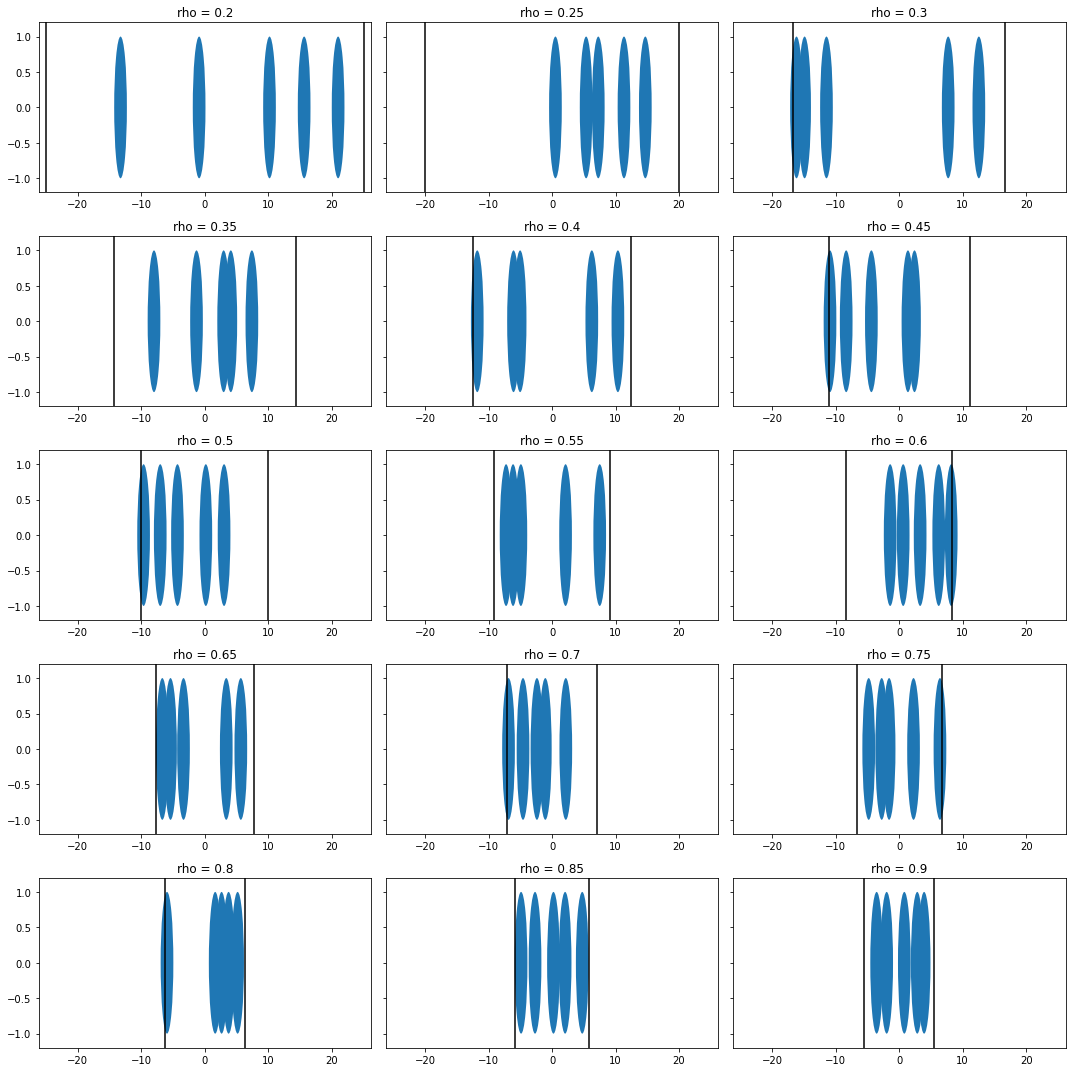

In [38]:
REALIZATION = 1
NCOL = 3
NROW = 5
fig, axes = plt.subplots(NROW, NCOL, sharex=False, sharey="all", squeeze=False, figsize=(NROW*3, NCOL*5))

MAX = simlib.length_from_density(np.min(data.rho), "sphere", 5, 1)+1.2

for pos, rho in enumerate(data.rho):
    x = pos % NCOL
    y = pos // NCOL
    for i in data.particle:
        axes[y,x].add_patch(plt.Circle((float(data.loc[rho,REALIZATION,i,0]),0.0), 1.0))
        axes[y,x].set_title(f"rho = {float(rho)}")
    axes[y,x].set_ylim(-1.2, 1.2)
    axes[y,x].set_xlim(-MAX,MAX)
    l = simlib.length_from_density(rho, "sphere", 5, 1)
    axes[y,x].axvline( l, color="black")
    axes[y,x].axvline(-l, color="black")
fig.tight_layout()
fig.show()